In [1]:
from utils.dataset import Dataset
from utils.utils import plot_signals
import numpy as np

In [2]:
dataset = Dataset()
data_path = '/home/ubuntu/Desktop/Projects/SNN/ecg_snn/dataset/'

records, annotations = dataset.load_dataset(data_path)

Loading dataset from:  /home/ubuntu/Desktop/Projects/SNN/ecg_snn/dataset/


In [3]:
X = []
y = []
X, y = dataset.preprocess(records, annotations)

In [4]:
print(len(X))

100012


In [5]:
print(np.shape(X), np.shape(y))

(100012, 360) (100012,)


In [22]:
from collections import Counter

class_counts = Counter(y)

for class_label, ch in class_counts.items():
    print(f"Class {class_label}: {ch} occurrences")

Class 0: 75011 occurrences
Class 3: 2546 occurrences
Class 4: 7129 occurrences
Class 1: 8071 occurrences
Class 2: 7255 occurrences


In [6]:
print(X[0][0:10])

[963.37445469 963.53694903 964.75662114 965.39906191 966.01708619
 966.37509859 966.61005412 966.77020724 966.86375124 966.95148508]


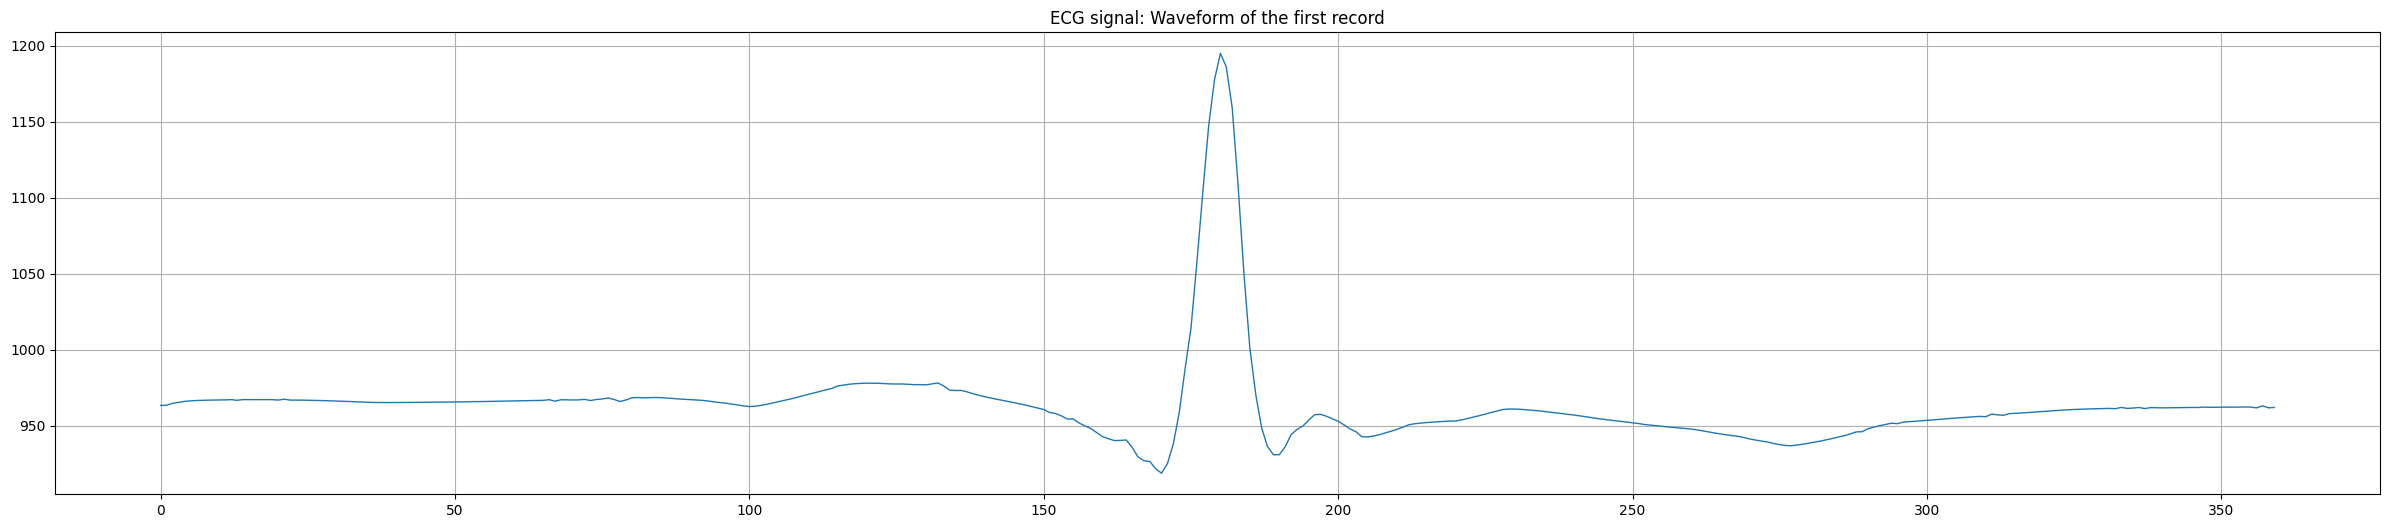

In [7]:

plot_signals(X[0], 'Waveform of the first record')


In [8]:
import os

In [9]:
import matplotlib.pyplot as plt

In [20]:
folder_path = '/home/ubuntu/Desktop/Projects/SNN/ecg_snn/dataset/signals/'

data = np.column_stack((X, y))  # Stack X and y side by side
file_path = os.path.join(folder_path, 'data.txt')
np.savetxt(file_path, data, delimiter='\t', fmt='%s')

print(f'Data saved to {file_path}')


Data saved to /home/ubuntu/Desktop/Projects/SNN/ecg_snn/dataset/signals/data.txt


In [10]:
X_rounded = [[round(val, 4) for val in row] for row in X]

In [11]:
print(X_rounded[0][0:10])

[963.3745, 963.5369, 964.7566, 965.3991, 966.0171, 966.3751, 966.6101, 966.7702, 966.8638, 966.9515]


In [24]:
folder_path = '/home/ubuntu/Desktop/Projects/SNN/ecg_snn/dataset/signals/'

data = np.column_stack((X_rounded, y))  # Stack X and y side by side
file_path = os.path.join(folder_path, 'data.txt')
np.savetxt(file_path, data, delimiter='\t', fmt='%s')

print(f'Data saved to {file_path}')

Data saved to /home/ubuntu/Desktop/Projects/SNN/ecg_snn/dataset/signals/data.txt


In [12]:
from snntorch import spikegen
import torch

In [13]:
X_rounded = torch.tensor(X_rounded)
spike_data = spikegen.delta(X_rounded, threshold=960 , off_spike=True)

In [14]:
spike_data.type()

'torch.DoubleTensor'

In [15]:
spike_data_numpy = spike_data.numpy()
print(spike_data_numpy[0][0:10])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [34]:
print(np.shape(spike_data_numpy))

(100012, 360)


In [35]:
print(spike_data_numpy[0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.